# Homework: Decision Tree
## Phase 2: Classification with scikit-learn
***

## Import Libraries

In [2]:
# complete
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

## Load Dataset (CSV file)

In [3]:
dataset = pd.read_csv('Decision_Tree_Dataset.csv', sep = ',', header = 0)
dataset.head()

,Result,Initial payment,Last payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094


## Dataset Information

Descriptive Statistics:

- Purpose: Summarize and describe the main characteristics of the dataset.
- Techniques: Calculate mean, median, mode, standard deviation, range, and other summary statistics.

In [4]:
# complete
dataset.describe()

,Initial payment,Last payment,Credit Score,House Number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


- provide a brief overview of the dataset (use info() )
- What is the nature of the data (e.g., text, numerical, images)?
- How many instances and features does the dataset contain?

In [5]:
# complete
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Result           1000 non-null   object
 1   Initial payment  1000 non-null   int64 
 2   Last payment     1000 non-null   int64 
 3   Credit Score     1000 non-null   int64 
 4   House Number     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
# complete
print(dataset.dtypes)

Result             object
Initial payment     int64
Last payment        int64
Credit Score        int64
House Number        int64
dtype: object


In [7]:
# complete
num_instances, num_features = dataset.shape

print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")

Number of instances: 1000
Number of features: 5


- Check for missing values

In [8]:
# complete
print(dataset.isnull().sum())

Result             0
Initial payment    0
Last payment       0
Credit Score       0
House Number       0
dtype: int64


## Visualization

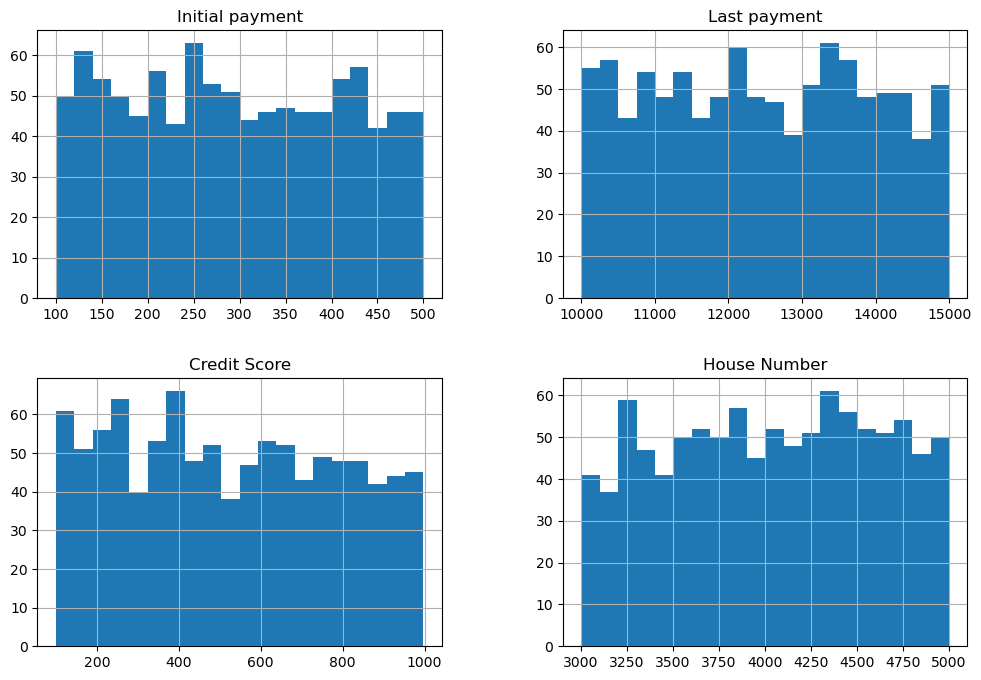

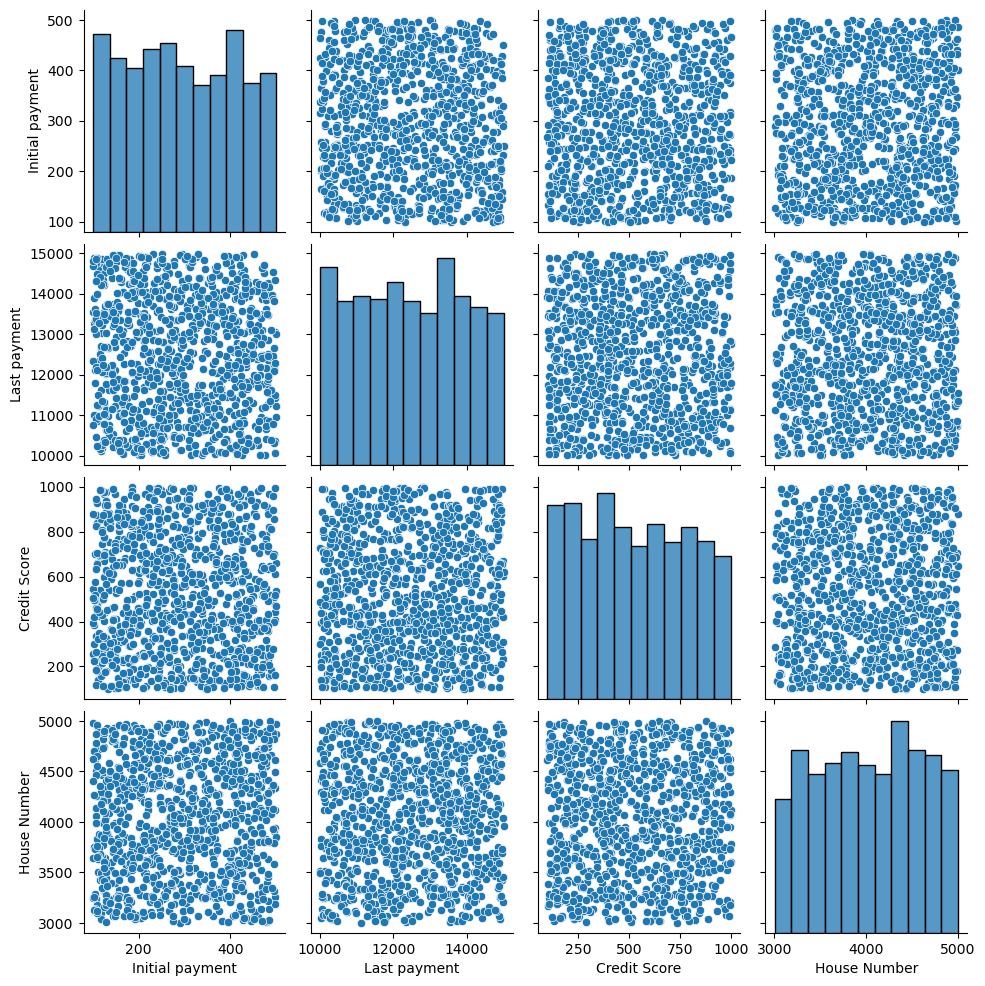

In [9]:
# complete(Extra Point)
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Initial payment', 'Last payment', 'Credit Score', 'House Number']

# Plot histograms for numerical features
dataset[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.show()

# Pairplot for scatter plots and histograms
sns.pairplot(dataset[numerical_columns])
plt.show()

## Model Building

In [10]:
#Separating the target variable
# complete

target_variable = 'Result'

# Separate features and target variable
X1 = dataset.drop(target_variable, axis=1)  # Features
y1 = dataset[target_variable]  # Target variable

#or we can do it this way - X1=X y1=Y
X = dataset.loc[:, ['Initial payment', 'Last payment', 'Credit Score', 'House Number']] 
Y = dataset.loc[:, ['Result']]


In [11]:
#Splitting dataset in to train and test data
# complete
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [12]:
#Model
# complete
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Prediction

In [24]:
#Make predictions
# complete
y_pred = decision_tree.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

## Evaluate the Model

Assess the model's performance using various metrics such as accuracy, precision, recall, and F1 score

In [57]:
# complete
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, pos_label='yes')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label='yes')
print(f"F1 Score: {f1}")


Accuracy: 0.9366666666666666
Precision: 0.91875
Recall: 0.9607843137254902
F1 Score: 0.939297124600639


In [16]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 42)
parameters = {"max_depth":[1, 2, 3, 4, 5, 7, 10],  
              "min_samples_leaf": [1, 3, 6, 10, 20]}

clf = GridSearchCV(dt, parameters, n_jobs= 1)

clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 6, 10, 20]})

In [18]:
print(clf.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1}


## Pruning

In [22]:
#bonus

In [19]:
import numpy as np
import pandas as pd
train_data_m = pd.read_csv('mushrooms_train.csv')
test_data_m = pd.read_csv('mushrooms_test.csv')
valid_data_m= pd.read_csv('mushrooms_valid.csv')
train_data_m.head()

,poisonous,capshape,capsurface,capcolor,bruises?,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,0,x,f,e,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,y,d
1,0,b,y,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
2,1,f,y,y,f,f,f,c,b,p,...,k,b,p,p,w,o,l,h,y,g
3,1,f,s,b,t,f,f,c,b,p,...,s,w,w,p,w,o,p,h,v,g
4,0,f,y,e,t,n,f,c,b,u,...,s,p,w,p,w,o,p,k,v,d


In [20]:
def calc_total_entropy(train_data, label,class_list):
    # complete
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset
        
    return total_entr

In [21]:
def calc_entropy(feature_value_data, label, class_list):
    # complete
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class)  #entropy
        entropy += entropy_class
    return entropy

In [22]:
def calc_info_gain(feature_name, train_data, label, class_list):
    # complete
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        
    return calc_total_entropy(train_data, label, class_list) - feature_info #calculating information gain by subtracting

In [23]:
def find_most_informative_feature(train_data, label, class_list):
    # complete
    feature_list = train_data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [24]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        
        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"
            
    return tree, train_data

In [25]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    # complete
    if train_data.shape[0] != 0: #if dataset becomes enpty after updating
        max_info_feature = find_most_informative_feature(train_data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset

In [26]:
def id3(train_data_m, label):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree, None, train_data, label, class_list)
    
    return tree

In [27]:
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    else:
        root_node = next(iter(tree))
        feature_value = instance[root_node]
        if feature_value in tree[root_node]:
            return predict(tree[root_node][feature_value], instance)
        else:
            return None

In [28]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows():
        result = predict(tree, test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]:
            correct_preditct += 1
        else:
            wrong_preditct += 1
    accuracy = correct_preditct / (correct_preditct + wrong_preditct)
    return accuracy

In [32]:
tree = id3(train_data_m, 'poisonous')

In [33]:
accuracy = evaluate(tree, test_data_m, 'poisonous')
print("accuracy:", accuracy)

accuracy: 0.7963400236127509


In [34]:
#start the pruning

In [ ]:
def rep_pruning(tree, validation_data, label):
    # complete